In [14]:
import diamon_read_data as dia
import influx_data_query as idb
import numpy as np
import pandas as pd
import datetime
import pickle
import plotting as p
import importlib
import pytz
import diamon_analysis as da
import main
from influx_data_utils.process_influx_data.datetime_localiser import \
    DatetimeLocaliser

In [15]:
data_dict = main.main()

In [16]:
data = data_dict["all_data"]
beam_df = data_dict["df"]
open_shutters = data_dict["open_shutter"]
closed_shutters = data_dict["closed_shutter"]

In [17]:
filtered_open = open_shutters.groupby("file_name").mean(numeric_only=True).reset_index().drop(columns=["t(s)", "ts2_current"])
filtered_closed = closed_shutters.groupby("file_name").mean(numeric_only=True).reset_index().drop(columns=["t(s)", "ts2_current"])

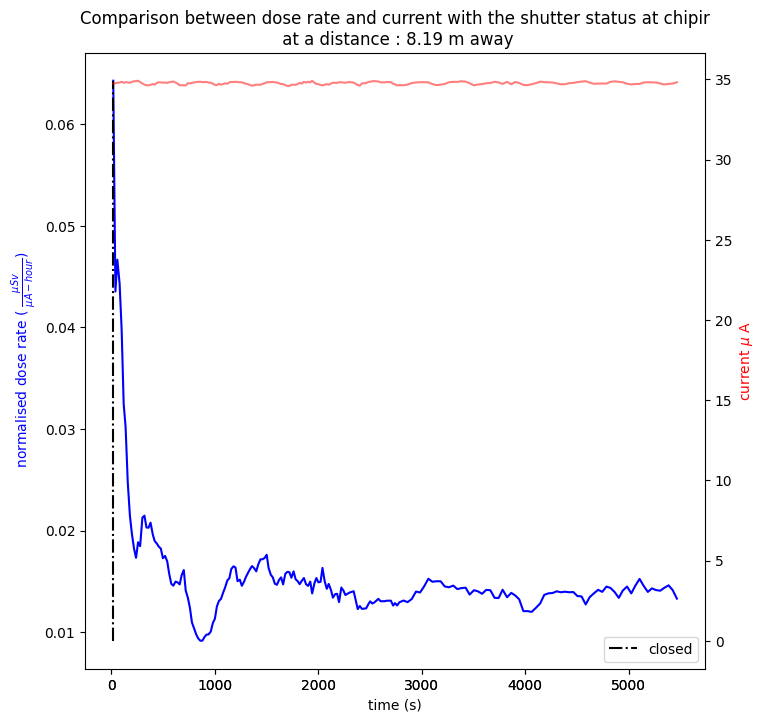

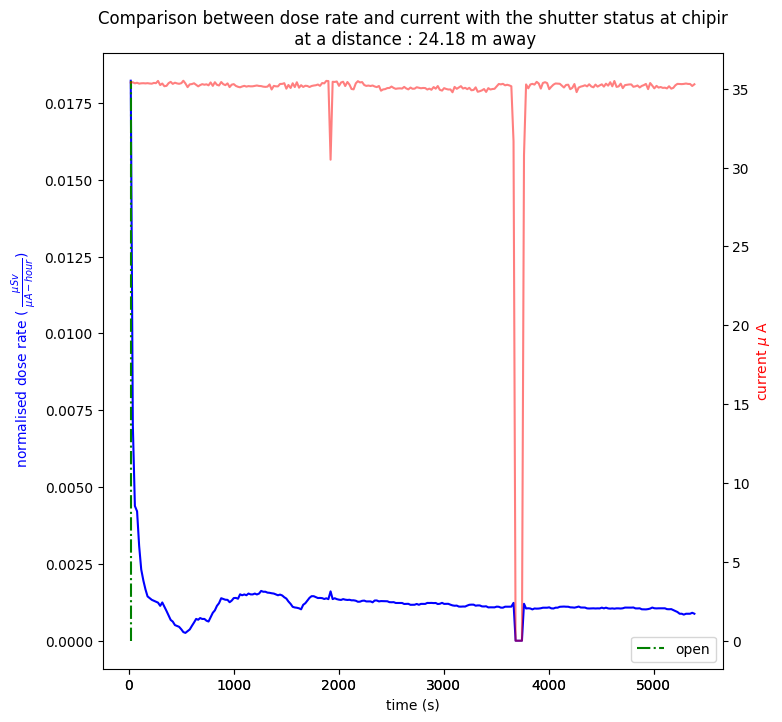

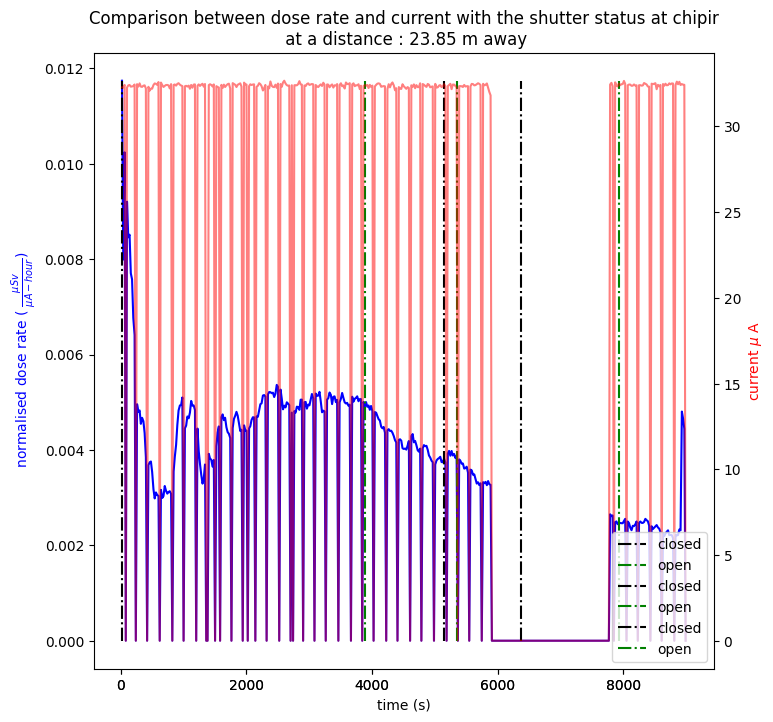

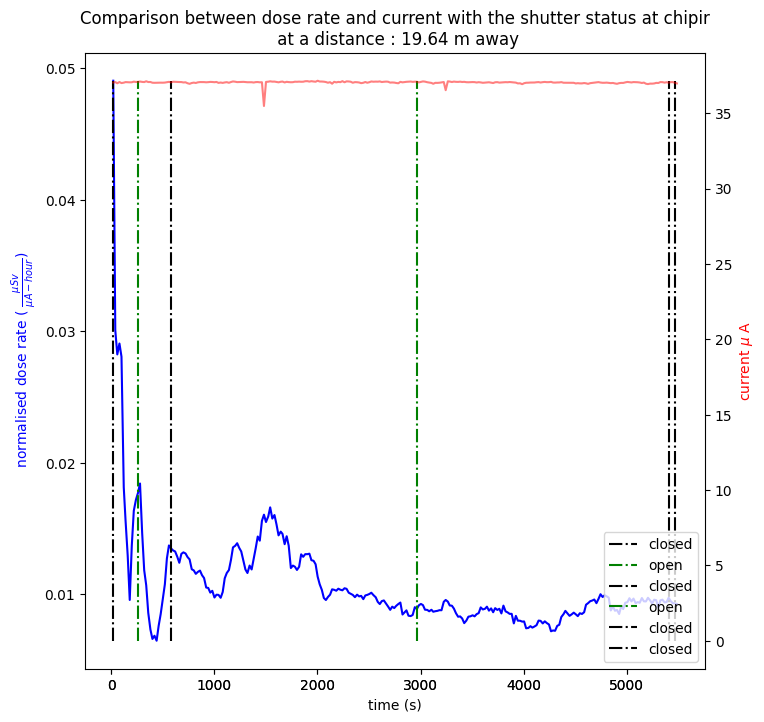

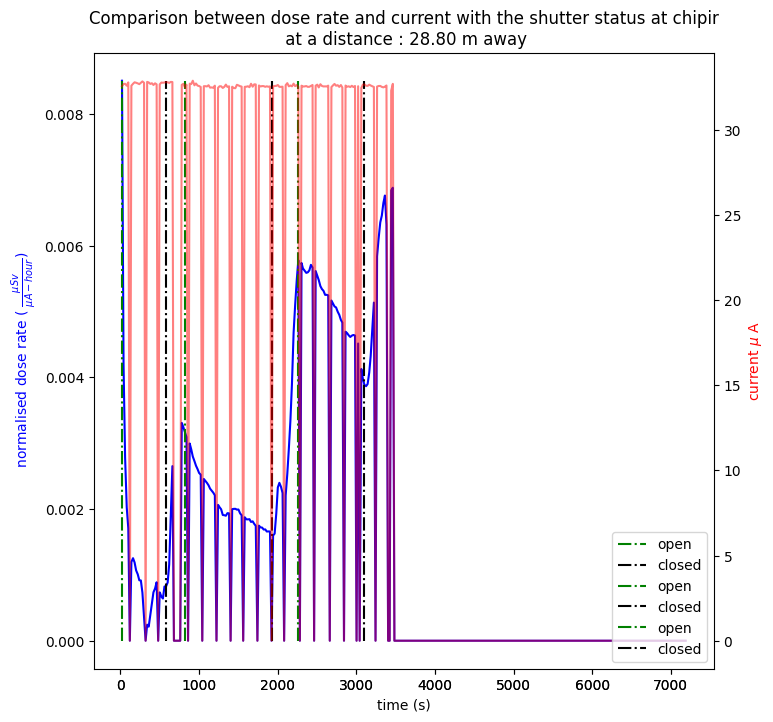

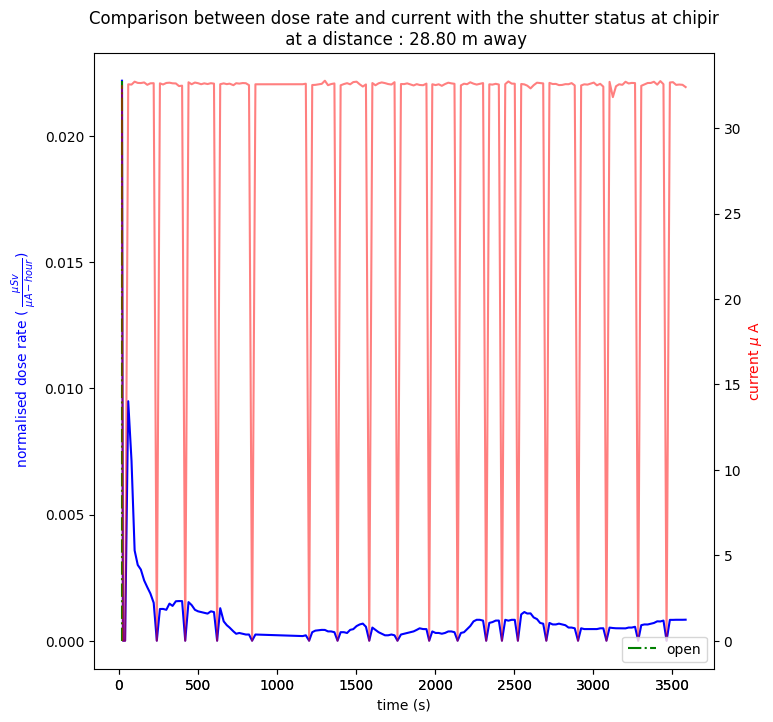

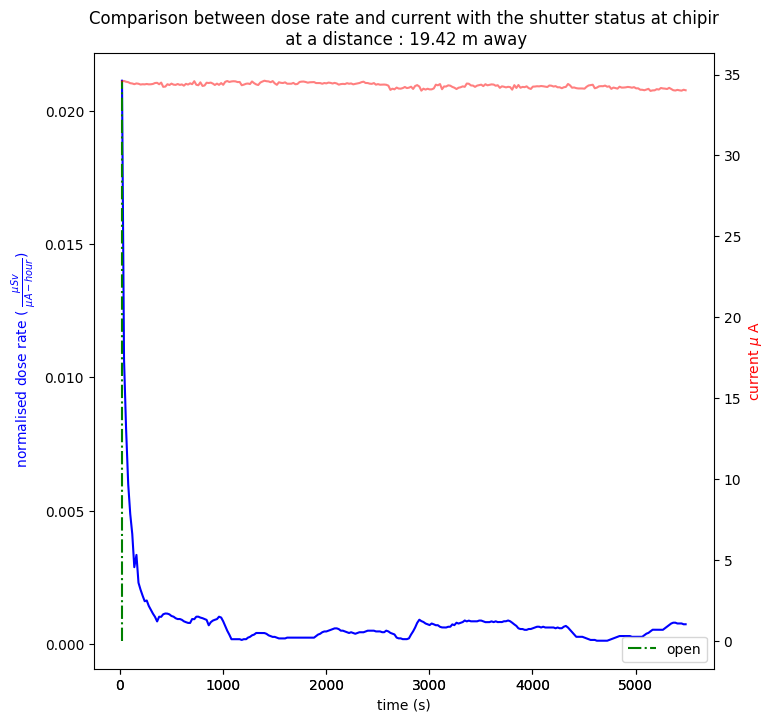

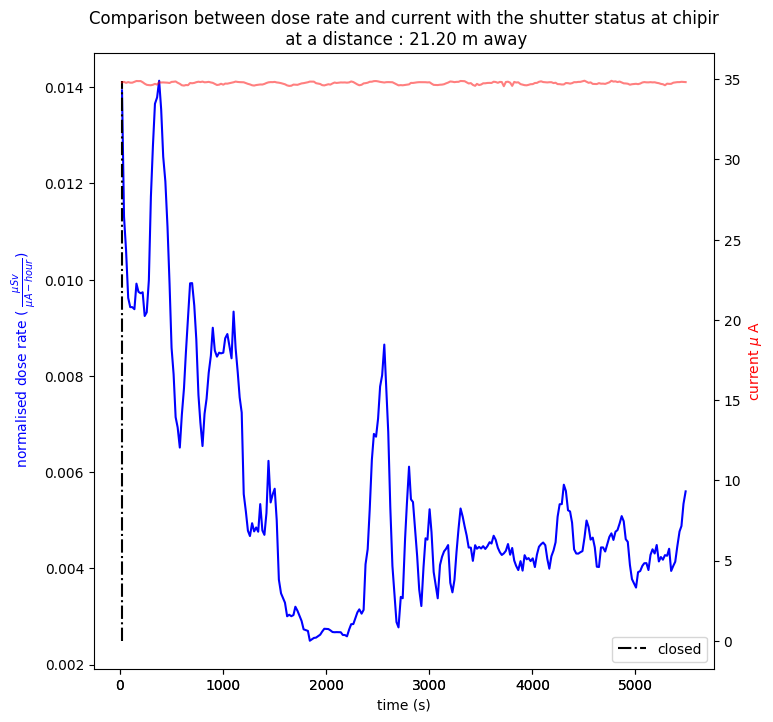

In [18]:
for key, result in data.items():
    if da.get_names(result["reference"])[1] == "chipir":
        p.plot_dose_time(result)

In [ ]:
for key, measurement in data.items():
    beamline = da.get_names(measurement["reference"])[1]:
    p.plot_energy_time(measurement, key, beamline)

In [ ]:
for key, beamline in beam_df.items():
    if not beamline.empty:
        p.plot_dose_distance(beamline, key)
        p.plot_combined_spect(beamline, key)
        p.plot_dose_rate(beamline, key)
        p.direction_bar_plot(beamline, key)
        p.stack_bar_plot(beamline, key=key)

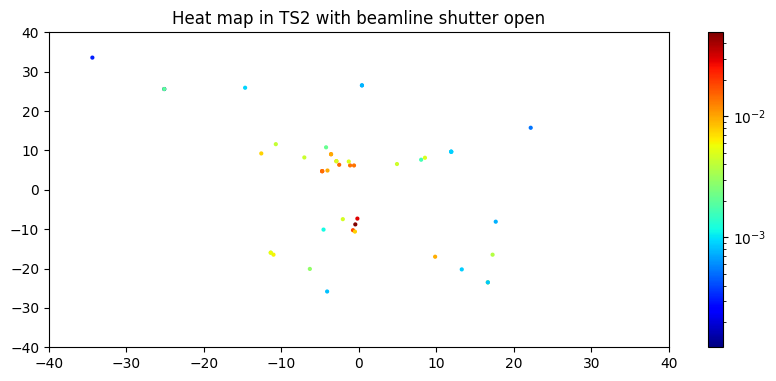

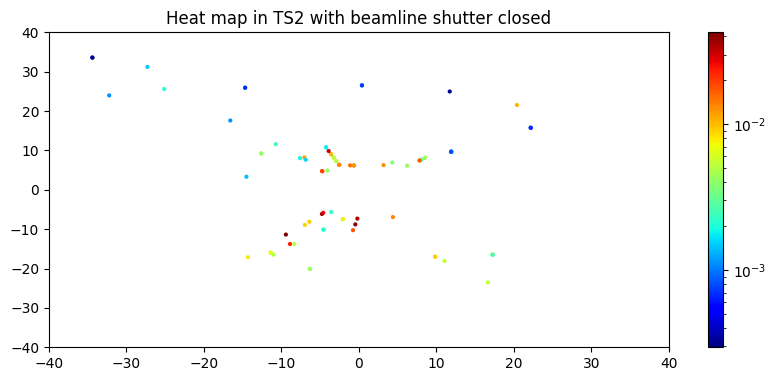

In [ ]:
p.plot_dose_map(open_shutters)
p.plot_dose_map(closed_shutters)


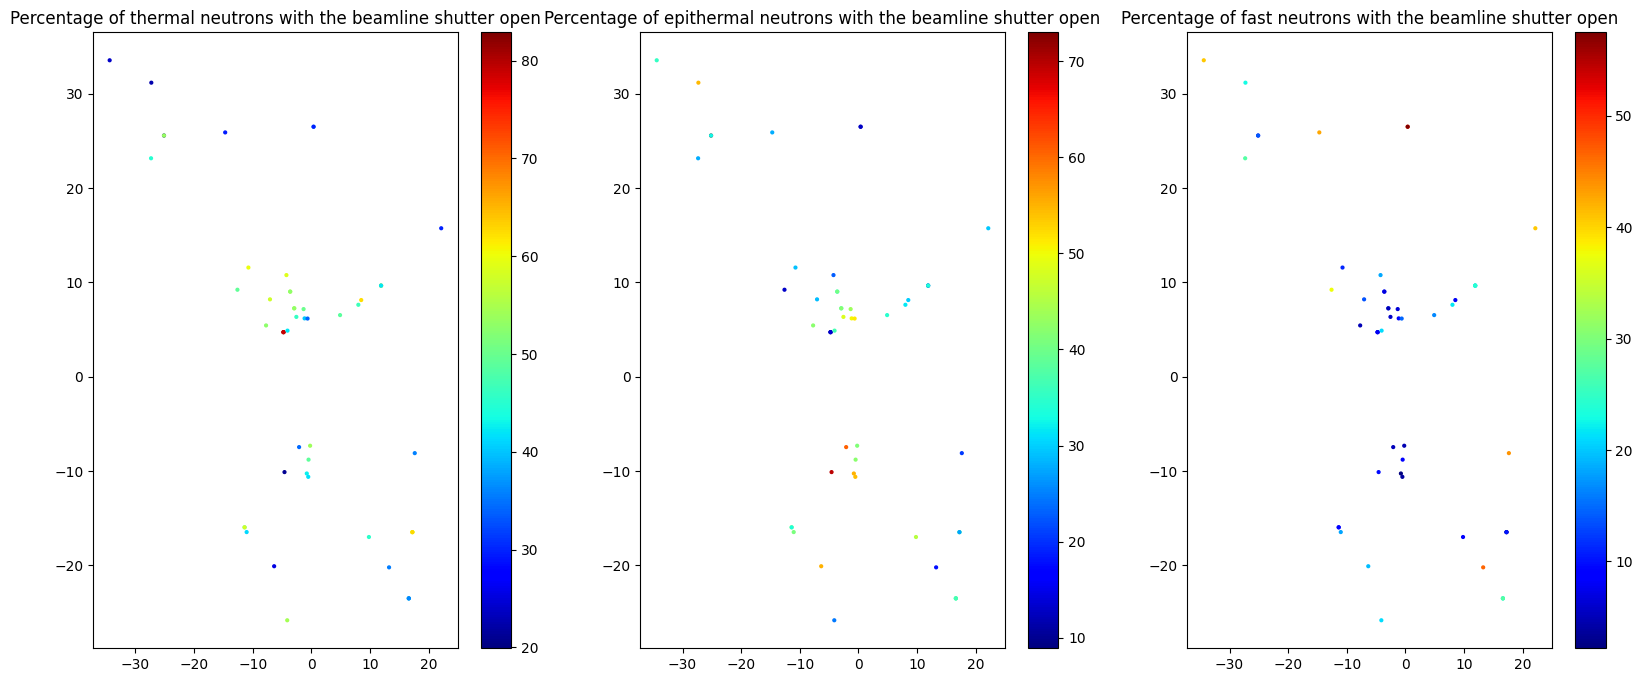

In [ ]:
p.plot_energy_map(open_shutters)